In [1]:
import pandas as pd
import numpy as np
import sklearn

Import Data

In [2]:
df = pd.read_csv('ass_5_train.csv')
df_t = pd.read_csv('ass_5_test.csv')

Look at Datasets

In [3]:
df.head(5)


,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,61518,19297675,-1,6,928106152,2541203883,3606287998,306394936,2967512603,...,0,0,0,0,0,0,0,1083418268,3831440054,830706566
1,-1,356604,19320277,-1,12,3382400190,2018710401,1302581498,2308170622,2967512603,...,2,0,0,0,6,0,0,2993954402,2379633508,1284343215
2,-1,603441,19346318,-1,20,2569487005,2018710401,4121075497,2210625817,2967512603,...,0,0,0,0,0,0,0,1601090997,3617851689,4220791646
3,-1,192754,19308171,-1,9,2569487005,2018710401,3531445293,652481754,2967512603,...,0,0,0,0,0,0,0,4114483006,3617851689,4220791646
4,-1,210892,19309442,-1,9,1659166197,2018710401,1047694444,2210625817,2967512603,...,0,0,0,0,0,0,0,1971402551,2196958187,830706566


--> Interpretation of visitTime: Time since last visit

In [4]:
#df.visitTime = pd.to_datetime(df.visitTime, unit ='s')
#df.purchaseTime = pd.to_datetime(df.purchaseTime, unit = 's')

In [5]:
import dtale

In [6]:
# Inspect if the PurchaseTime was converted well
d = dtale.show(df)
# d.open_browser()

In [7]:
# Replace NaN again with 0 as Dates have been parsed now


In [8]:
#Look at all columns
df.columns

Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   label         31428 non-null  int64
 1   id            31428 non-null  int64
 2   visitTime     31428 non-null  int64
 3   purchaseTime  31428 non-null  int64
 4   hour          31428 non-null  int64
 5   C1            31428 non-null  int64
 6   C2            31428 non-null  int64
 7   C3            31428 non-null  int64
 8   C4            31428 non-null  int64
 9   C5            31428 non-null  int64
 10  C6            31428 non-null  int64
 11  C7            31428 non-null  int64
 12  C8            31428 non-null  int64
 13  N1            31428 non-null  int64
 14  C9            31428 non-null  int64
 15  N2            31428 non-null  int64
 16  N3            31428 non-null  int64
 17  N4            31428 non-null  int64
 18  N5            31428 non-null  int64
 19  N6            31428 non-n

Transform C columns into categories

In [10]:
df[['hour', 'C1', 'C2', 'C3','C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']] = df[['hour', 'C1', 'C2', 'C3','C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']].astype('category')

In [11]:
df.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,61518,19297675,-1,6,928106152,2541203883,3606287998,306394936,2967512603,...,0,0,0,0,0,0,0,1083418268,3831440054,830706566
1,-1,356604,19320277,-1,12,3382400190,2018710401,1302581498,2308170622,2967512603,...,2,0,0,0,6,0,0,2993954402,2379633508,1284343215
2,-1,603441,19346318,-1,20,2569487005,2018710401,4121075497,2210625817,2967512603,...,0,0,0,0,0,0,0,1601090997,3617851689,4220791646
3,-1,192754,19308171,-1,9,2569487005,2018710401,3531445293,652481754,2967512603,...,0,0,0,0,0,0,0,4114483006,3617851689,4220791646
4,-1,210892,19309442,-1,9,1659166197,2018710401,1047694444,2210625817,2967512603,...,0,0,0,0,0,0,0,1971402551,2196958187,830706566


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

Create Heatmap to see Multicolinearity
- Pearson Correlation can usually only be used for Regressions, however for a binary classification it is also possible.

<AxesSubplot:>

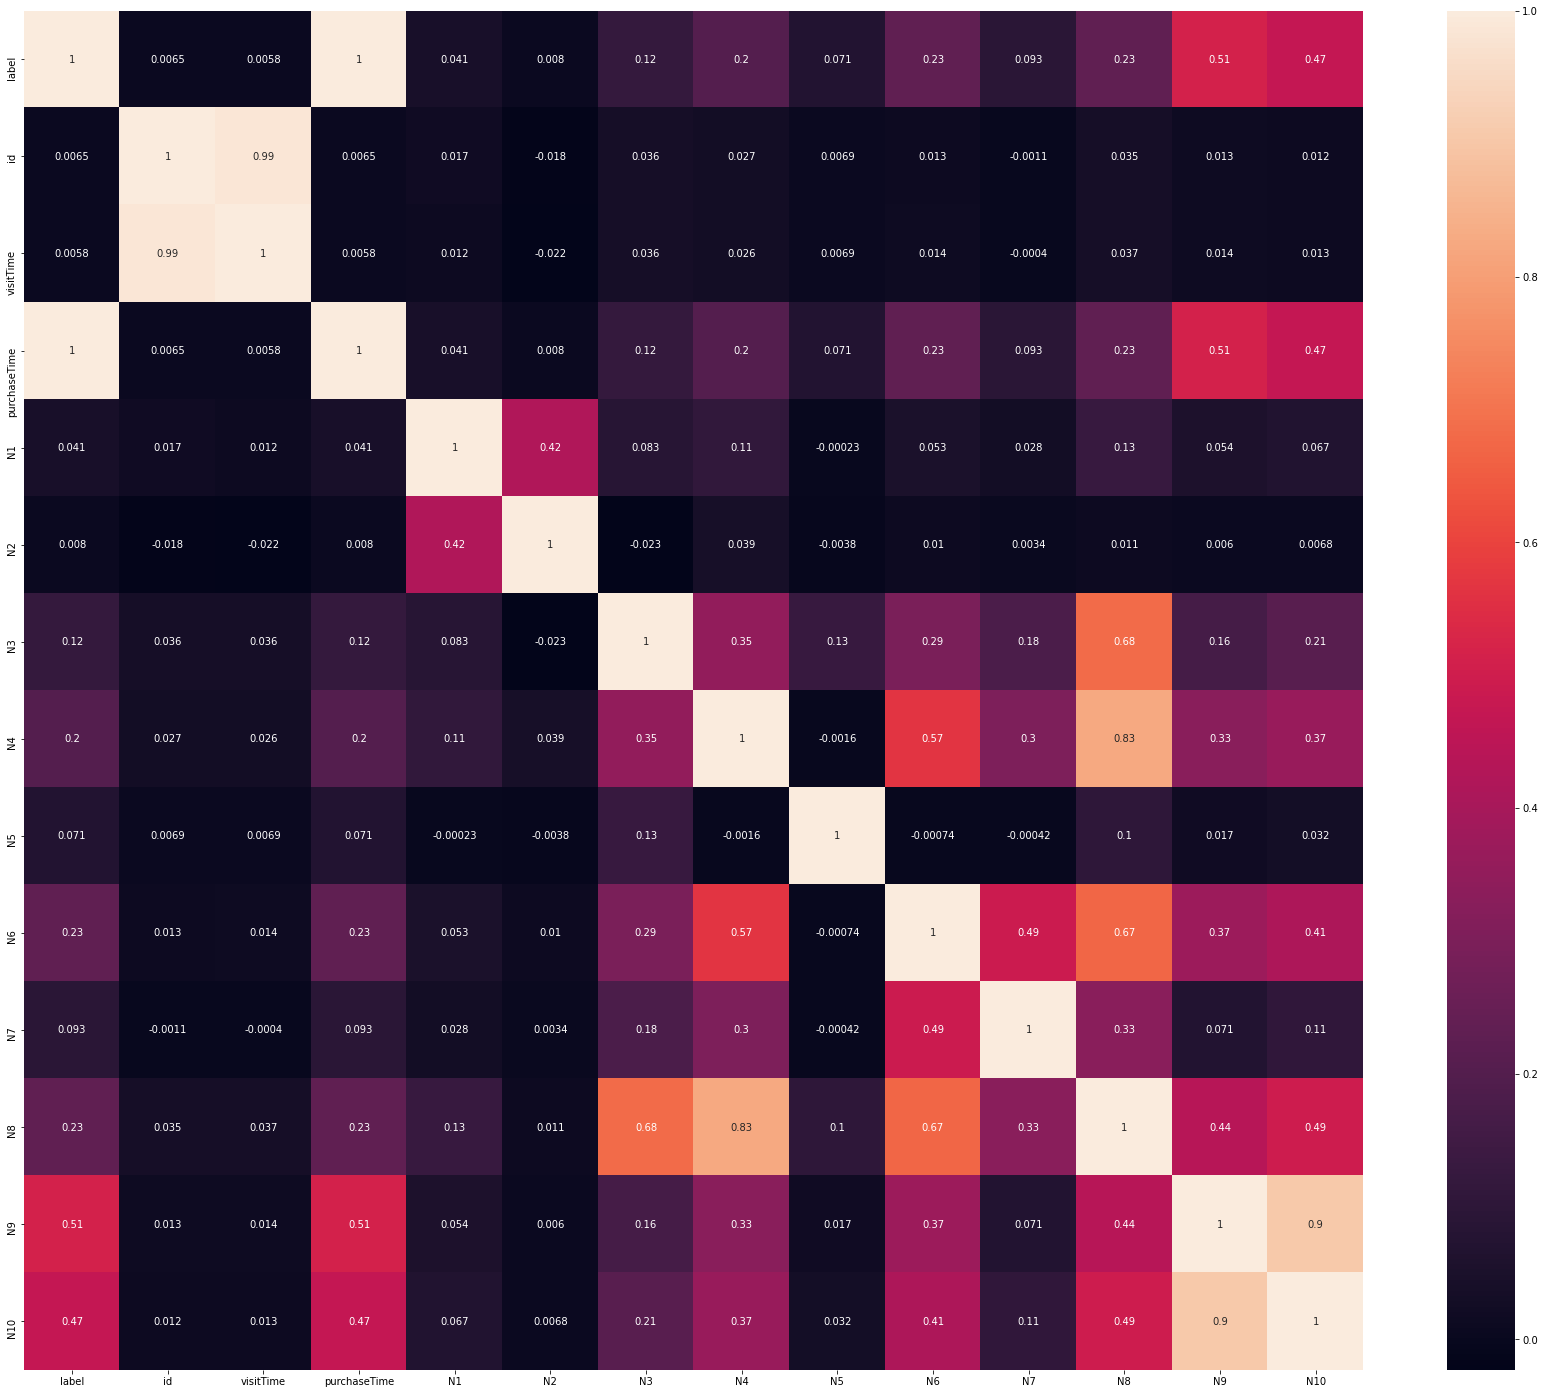

In [13]:
df_corr = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_corr, annot = True)

When looking at the Heatmap, as a first step one has to remind itself of the definiton for multicolinearity:
- Multicolinearity is a problem if it is between dependent variables. Hence, when looking at the heatmap one can argue N4 is multicolinear with N8 and therefore once of these variables have to be dropped.

This means, that the high correlation of purchaseTime and visitTime with label does not account for a multicolinear problem

As a next step, one has to decide with which features we want to continue. There are several ways which I will try to different ones:
- Option 1: Only use purchaseTime and visit Time as there very highly correlated with label and therefore promise a good results
- Option 2: Use all the features except for the ones we have to drop due to multicolinearity

<AxesSubplot:>

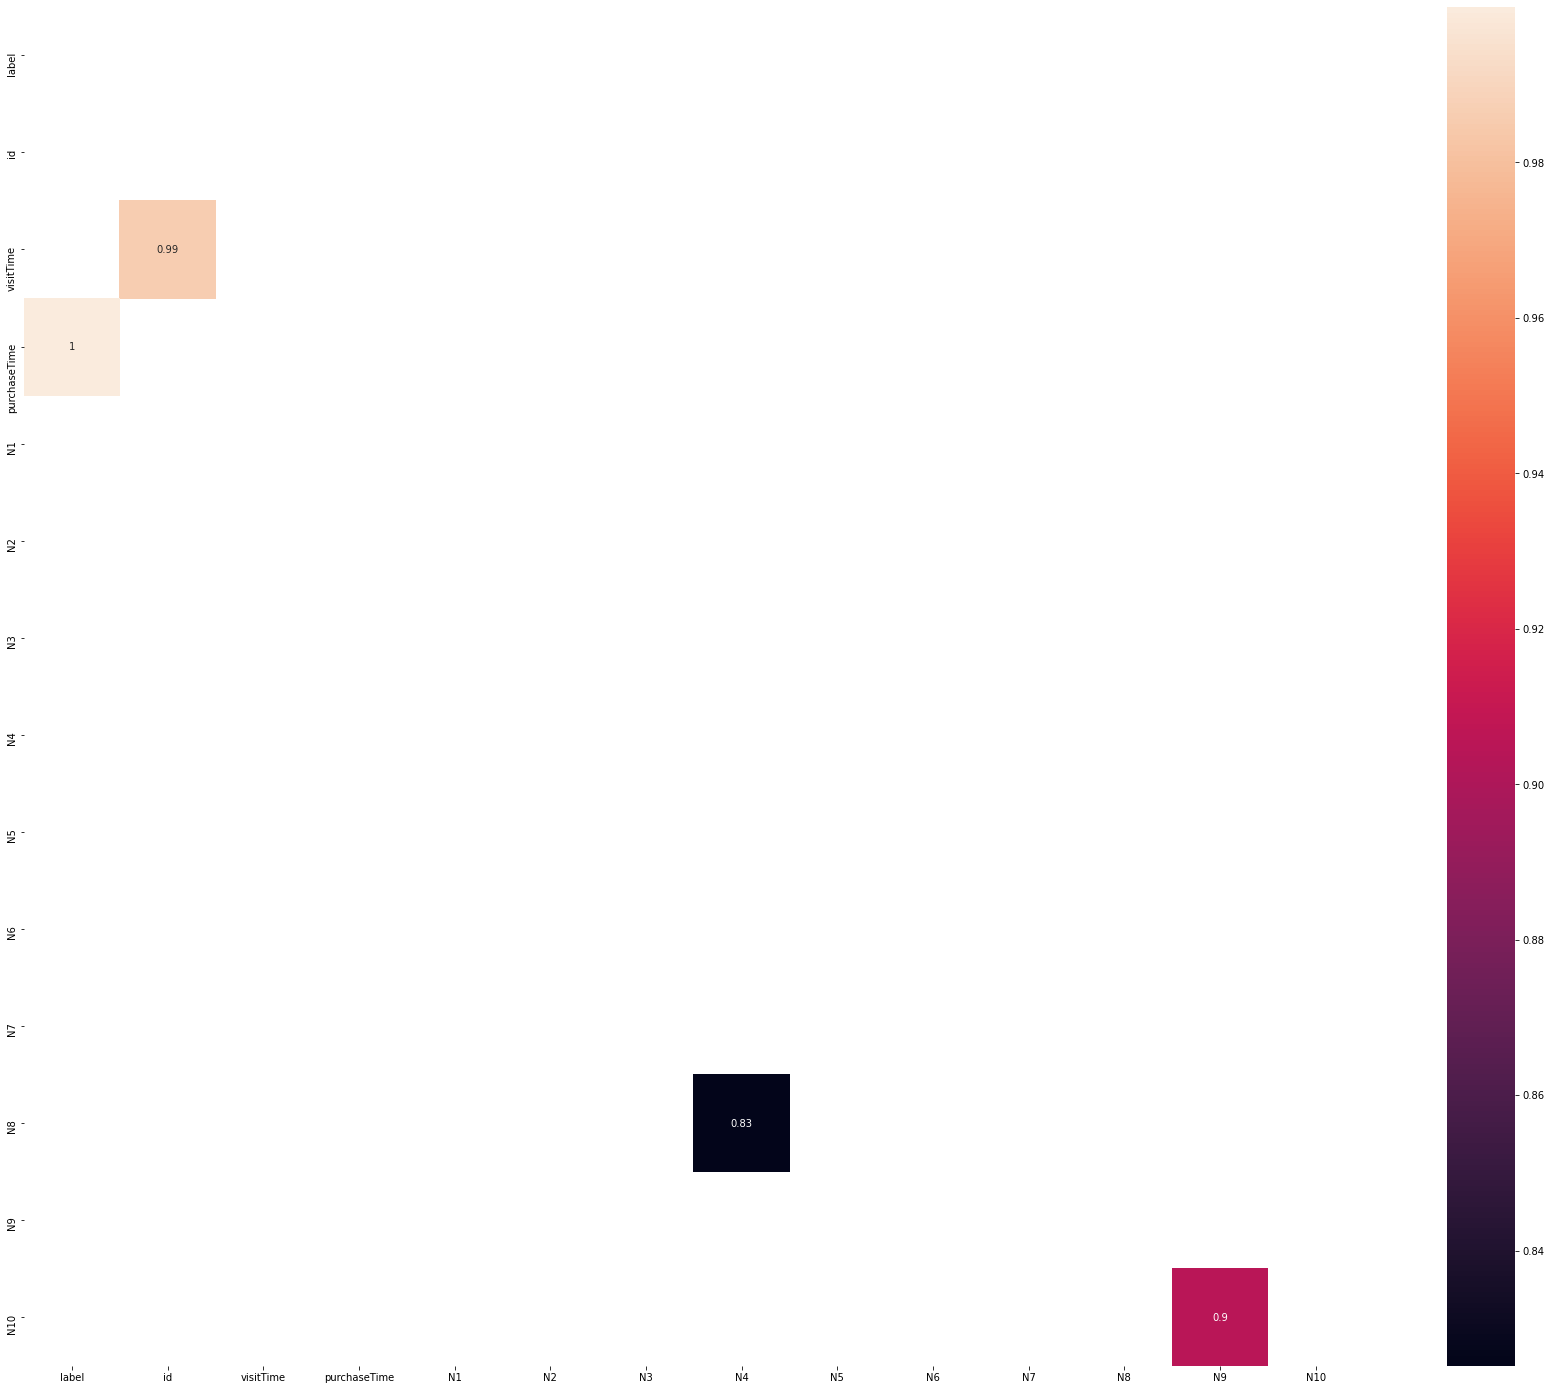

In [14]:
#Select only bottom of the correlation matrix
df_corr_MC = df_corr[df_corr > 0.7]

mask_ut=np.triu(np.ones(df_corr_MC.shape)).astype(np.bool)
plt.figure(figsize=(30,25))
sns.heatmap(df_corr_MC, mask = mask_ut, annot = True)

- Removal of N10 and N4 as they have a correlation with an other independent Variable (multicolinearity) of the chose value 0.7
- N10 and N4 are chosen over N8 and N9 as they have a better correlation with label

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_1 = df[['purchaseTime', 'visitTime']]
x_1.head()

,purchaseTime,visitTime
0,-1,19297675
1,-1,19320277
2,-1,19346318
3,-1,19308171
4,-1,19309442


In [17]:
y = df[['label']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size= 0.2)

Creating Option 1:

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train.values.ravel()).predict(x_test)

Score model

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6277
           1       1.00      1.00      1.00         9

    accuracy                           1.00      6286
   macro avg       1.00      1.00      1.00      6286
weighted avg       1.00      1.00      1.00      6286



From the Naive Bayes we see that precision, recall as well as F1 Scores are 1 --> Hence, the model can very accurately predict the label with the features:
-  Option 1:
   - visitTime
   - purchaseTime

Hence, it does not make sense to further investigate other models if the score of the test set will yield in the sames scores

# Trained model used on test DF

In [23]:
df_t.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,25540,19420446,-1,16,2569487005,2018710401,1429850909,2308170622,2967512603,...,0,0,0,0,0,0,0,1887882016,3617851689,4220791646
1,-1,29938,19431062,-1,19,1981742921,1235983246,4203734567,652481754,2116767313,...,0,0,0,0,0,0,0,3375463994,2379633508,1284343215
2,-1,9585,19392956,-1,8,2486871669,1235983246,2776175989,652481754,2116767313,...,0,0,0,0,0,0,0,3441876061,2196958187,1550397227
3,-1,23597,19416124,-1,15,3427628467,1235983246,4172481347,652481754,2116767313,...,0,0,0,0,0,0,0,2835356425,3831440054,1213938795
4,-1,27695,19425109,-1,17,2214885086,2541203883,3948279888,652481754,2967512603,...,0,0,0,0,0,0,0,1453469701,3831440054,830706566


In [24]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32086 entries, 0 to 32085
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   label         32086 non-null  int64
 1   id            32086 non-null  int64
 2   visitTime     32086 non-null  int64
 3   purchaseTime  32086 non-null  int64
 4   hour          32086 non-null  int64
 5   C1            32086 non-null  int64
 6   C2            32086 non-null  int64
 7   C3            32086 non-null  int64
 8   C4            32086 non-null  int64
 9   C5            32086 non-null  int64
 10  C6            32086 non-null  int64
 11  C7            32086 non-null  int64
 12  C8            32086 non-null  int64
 13  N1            32086 non-null  int64
 14  C9            32086 non-null  int64
 15  N2            32086 non-null  int64
 16  N3            32086 non-null  int64
 17  N4            32086 non-null  int64
 18  N5            32086 non-null  int64
 19  N6            32086 non-n

In [25]:
x_2 = df_t[['purchaseTime', 'visitTime']]
x_2.head()

,purchaseTime,visitTime
0,-1,19420446
1,-1,19431062
2,-1,19392956
3,-1,19416124
4,-1,19425109


In [26]:
y_2 = df_t[['label']]

In [27]:
y_pred2 = gnb.predict(x_2)

Score model for test df

In [28]:
print(classification_report(y_2,y_pred2))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     32086

    accuracy                           1.00     32086
   macro avg       1.00      1.00      1.00     32086
weighted avg       1.00      1.00      1.00     32086



Looking at the output of the classification report one could think this id odd.
However, when looking at the labeled data of the test df, one realizes that only -1 is supposed to be predicted. Hence, the NB Algorithm works very accurately with only the two features:
 - visitTime
 - purchaseTime

Hence, Option 2 and further feature selection is not necessary

Preparing deliverable

In [29]:
y_proba = gnb.predict_proba(x_2)

In [30]:
y_proba = pd.DataFrame(y_proba)
y_proba

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
32081,1.0,0.0
32082,1.0,0.0
32083,1.0,0.0
32084,1.0,0.0


In [31]:
prob = y_proba[1]
prob

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32081    0.0
32082    0.0
32083    0.0
32084    0.0
32085    0.0
Name: 1, Length: 32086, dtype: float64

In [32]:
df_final = pd.DataFrame(prob)
df_final

,1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
32081,0.0
32082,0.0
32083,0.0
32084,0.0


In [33]:
df_final = pd.concat([df_t.id, df_final], axis = 1)

In [34]:
hand_in = df_final.rename(columns={1:'Prob'})

In [35]:
hand_in

,id,Prob
0,25540,0.0
1,29938,0.0
2,9585,0.0
3,23597,0.0
4,27695,0.0
...,...,...
32081,25657,0.0
32082,6384,0.0
32083,26582,0.0
32084,5394,0.0


In [36]:
hand_in.to_csv('Assignment 3&4 Hand in.csv', index = False)




# Out of Curiosity trying with XG Boost
--> Outcome the same as with GNB

Trying with XGboost

In [37]:
from xgboost import XGBClassifier

In [38]:
model_x = XGBClassifier()

In [39]:
model_x.fit(x_train, y_train.values.ravel())
y_pred_x = model_x.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred_x))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6277
           1       1.00      1.00      1.00         9

    accuracy                           1.00      6286
   macro avg       1.00      1.00      1.00      6286
weighted avg       1.00      1.00      1.00      6286



In [41]:
y_pred_x2 = model_x.predict(x_2)

In [42]:
print(classification_report(y_2,y_pred_x2))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     32086

    accuracy                           1.00     32086
   macro avg       1.00      1.00      1.00     32086
weighted avg       1.00      1.00      1.00     32086



In [43]:
y_proba_x = gnb.predict_proba(x_test2)

NameError: name 'x_test2' is not defined

In [ ]:
pd.DataFrame(y_proba_x).head()